Cifar-10 據書上說是由深度學習大師 Geoffrey Hinton 教授與其在加拿大多倫多大學的學生 Alex Krixhevsky 與 Vinoid Nair 所整理之影像資料集, 包含 6 萬筆 32*32 低解析度之彩色圖片, 其中 5 萬筆為訓練集; 1 萬筆為測試集, 是機器學習中常用的圖片辨識資料集

In [1]:
import numpy as np
import random
import PIL
import matplotlib.pyplot as plt


Cifar-10資料集的大小約為170mb, 我們可以透過keras提供的方法來載入這個資料集,使用方法為  
```python
from tensorflow.keras.datasets import cifar10
```
匯入完畢後我們就可以使用 `python cifar10.load_data()`來載入資料集。第一次使用的時候必須先從網路上下載這個資料集，因此會先花掉一點時間。

In [ ]:
from tensorflow.keras.datasets import cifar10

下載下來的資料會被存放在下面的位置，同學們可以自行到該資料夾位置查看實際的檔案    
(windows)`C:\Users\MY_USER_NAME\.keras\datasets`  
(ubuntu)`~/.keras/datasets/cifar-10-batches-py`  
載入的資料會自動被分成訓練資料與測試資料，兩種資料分別有影像資料跟對應的標記.我們可以使用下面的語法將他區分開來:

In [2]:
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

Let's take a glance at the data:

In [3]:
X_train.shape

(50000, 32, 32, 3)

Here we randomly choose an image to see what it is. You can try to re-run the following block to see the training images.

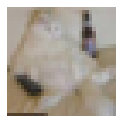

In [11]:
idx = random.randint(0, 49999)
im = X_train[idx]
plt.figure(figsize=(2,2))
plt.axis('off')
plt.imshow(im)
plt.show()

the variable `y_train` stores the label of each image. In this dataset, each label is represented as a number. Because there are 10 classes in this dataset, the value in `y_train` ranges from 0-9. You can use the print function to see the label for each image.

In [12]:
print(y_train[0])   # 0 is the label of the first image

[6]


In order to have a more concrete discription about the dataset, we create a dictionary to display the label name for each class. 接著我們可以隨機的挑出幾張圖片並標記出對應的類別名稱

In [78]:
label_name=['airplaine', 'automobile', 'bird', 'cat', 'deer', 
            'dog', 'frog', 'horse', 'ship', 'truck']

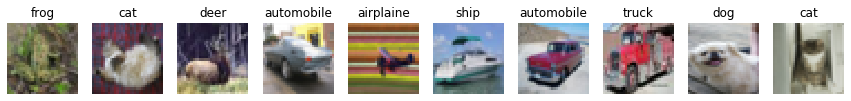

In [79]:
fig, ax = plt.subplots(1, 10, figsize=(15,5))
for i in range(10):
    idx = random.randint(0, 49999)
    im = X_train[idx]
    label = y_train[idx][0]
    ax[i].imshow(im)
    ax[i].set_title(label_name[label])
    ax[i].axis('off')

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D, Flatten, BatchNormalization, Dropout

In [35]:
mlp_model = Sequential()

mlp_model.add(Flatten(input_shape=(32,32,3), name = 'input'))
mlp_model.add(Dense(512, activation = 'tanh', name = 'hidden1'))
mlp_model.add(Dense(10, activation = 'sigmoid', name = 'output'))

mlp_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

In [25]:
mlp_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (Flatten)              (None, 3072)              0         
_________________________________________________________________
hidden1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
output (Dense)               (None, 10)                5130      
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
_________________________________________________________________


把資料交由模型訓練前, 我們必須把資料正規化. 這邊正規化的意思是, 原本數位影像儲存的資訊是0-255, 我們要把他正規化到0-1之間, 這樣模型才能學得比較穩定.

In [26]:
X_train = X_train/255

The original value in y_train is a number from 0-9, which implies the 10 different types of objects. For classification problems, we have to convert this numerical output to categorical output using **one-hot encoding**. The one-hot encoding is to represent data as binary vectors. Each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1. For example, if you have three classes RED, YELLOW, and GREEN, you can represent each class as [1, 0, 0], [0, 1, 0], and [0, 0, 1] respectively.  
You can achieve this by using a tool `to_categorical` in the keras library.

In [27]:
from tensorflow.keras.utils import to_categorical
y_categorical = to_categorical(y_train)

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
trainX, validX, trainY, validY = train_test_split(X_train,y_categorical, test_size=0.25, random_state=42)

In [36]:
history = mlp_model.fit(trainX, trainY, epochs=20, validation_data=(validX, validY))

Train on 37500 samples, validate on 12500 samples
Epoch 1/20
37500/37500 [==============================] - 5s 141us/sample - loss: 2.0542 - acc: 0.2294 - val_loss: 1.9044 - val_acc: 0.3075
Epoch 2/20
37500/37500 [==============================] - 6s 156us/sample - loss: 1.9154 - acc: 0.3041 - val_loss: 1.9046 - val_acc: 0.3228
Epoch 3/20
37500/37500 [==============================] - 6s 158us/sample - loss: 1.8657 - acc: 0.3280 - val_loss: 1.8620 - val_acc: 0.3186
Epoch 4/20
37500/37500 [==============================] - 6s 148us/sample - loss: 1.8340 - acc: 0.3408 - val_loss: 1.8426 - val_acc: 0.3225
Epoch 5/20
37500/37500 [==============================] - 5s 141us/sample - loss: 1.8106 - acc: 0.3466 - val_loss: 1.8501 - val_acc: 0.3326
Epoch 6/20
37500/37500 [==============================] - 4s 118us/sample - loss: 1.8034 - acc: 0.3505 - val_loss: 1.8838 - val_acc: 0.3233
Epoch 7/20
37500/37500 [==============================] - 5s 138us/sample - loss: 1.7846 - acc: 0.3587 - val_l

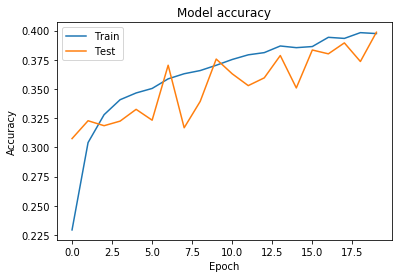

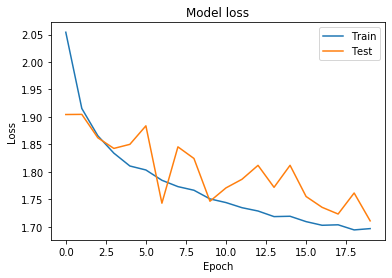

In [44]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Let's see if we can get better result using a complex model - Convolution Neural Network (CNN)

In [58]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, (3, 3), padding='same', input_shape=(32, 32, 3), activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
cnn_model.add(MaxPool2D(pool_size=(2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(10, activation='softmax'))

cnn_model.compile(loss='categorical_crossentropy',
                  optimizer= tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6),
                  metrics=['accuracy'])

In [59]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               2097664   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
__________

In [60]:
history = cnn_model.fit(trainX, trainY, epochs=20, validation_data=(validX, validY))

Train on 37500 samples, validate on 12500 samples
Epoch 1/20
37500/37500 [==============================] - 11s 298us/sample - loss: 1.7786 - acc: 0.3646 - val_loss: 1.5314 - val_acc: 0.4618
Epoch 2/20
37500/37500 [==============================] - 12s 309us/sample - loss: 1.4737 - acc: 0.4723 - val_loss: 1.3770 - val_acc: 0.5163
Epoch 3/20
37500/37500 [==============================] - 12s 319us/sample - loss: 1.3503 - acc: 0.5203 - val_loss: 1.2566 - val_acc: 0.5580
Epoch 4/20
37500/37500 [==============================] - 12s 332us/sample - loss: 1.2616 - acc: 0.5542 - val_loss: 1.1856 - val_acc: 0.5871
Epoch 5/20
37500/37500 [==============================] - 13s 335us/sample - loss: 1.1916 - acc: 0.5818 - val_loss: 1.1400 - val_acc: 0.6016
Epoch 6/20
37500/37500 [==============================] - 13s 343us/sample - loss: 1.1335 - acc: 0.6011 - val_loss: 1.0937 - val_acc: 0.6166
Epoch 7/20
37500/37500 [==============================] - 12s 323us/sample - loss: 1.0837 - acc: 0.6204 

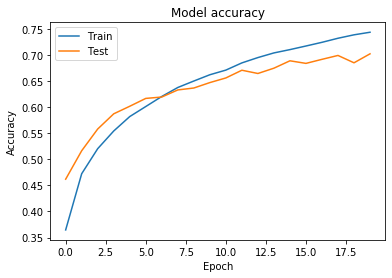

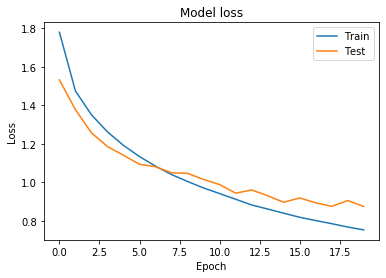

In [61]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

Let's test the performance of the model.

In [67]:
X_test = X_test/255
y_pred = cnn_model.predict(X_test)

In [63]:
y_test_categorical = to_categorical(y_test)

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.argmax(axis=1), target_names=label_name))

              precision    recall  f1-score   support

   airplaine       0.69      0.79      0.74      1000
  automobile       0.81      0.78      0.80      1000
        bird       0.60      0.61      0.61      1000
         cat       0.50      0.55      0.53      1000
        deer       0.70      0.63      0.66      1000
         dog       0.67      0.56      0.61      1000
        frog       0.82      0.73      0.77      1000
       horse       0.76      0.77      0.76      1000
        ship       0.78      0.83      0.80      1000
       truck       0.74      0.80      0.77      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000

